In [1]:
#PreProcessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import joblib
import warnings
warnings.filterwarnings('ignore')
#Feature Engineering
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier        # recommended for feature importance
from catboost import CatBoostClassifier  # optional alternative, handles categorical features natively
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('D:/Machine Learning Projects/2. Employee_Attrition_Prediction/0_HR-Employee-Attrition.csv')

# Pre-Processing

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
missing_values = df.isna().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
minmax_values = df.aggregate(['min','max'])
print(minmax_values)

     Age Attrition BusinessTravel  DailyRate       Department  \
min   18        No     Non-Travel        102  Human Resources   
max   60       Yes  Travel_Rarely       1499            Sales   

     DistanceFromHome  Education    EducationField  EmployeeCount  \
min                 1          1   Human Resources              1   
max                29          5  Technical Degree              1   

     EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
min               1  ...                         1            80   
max            2068  ...                         4            80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
min                 0                  0                      0   
max                 3                 40                      6   

    WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
min               1               0                  0   
max               4              40                 18   

     YearsSinc

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [3]:
df = df.drop(['Over18'], axis=1)

### Encoding

In [9]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [14]:
categorical_features = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [16]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[categorical_features])

In [23]:
joblib.dump(encoder, "D:/Machine Learning Projects/2. Employee_Attrition_Prediction/onehot_encoder.pkl")

['D:/Machine Learning Projects/2. Employee_Attrition_Prediction/onehot_encoder.pkl']

In [17]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features), index=df.index)

In [18]:
encoded_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
df_encoded = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

In [26]:
#remove .0
df_encoded = df_encoded.astype({col: int for col in encoded_df.columns})

In [27]:
df_encoded.head(20)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,0,0,0,1,0,1,0
5,32,0,1005,2,2,1,8,4,79,3,...,0,0,0,0,0,0,0,1,1,0
6,59,0,1324,3,3,1,10,3,81,4,...,0,0,0,0,0,0,1,0,0,1
7,30,0,1358,24,1,1,11,4,67,3,...,0,0,0,0,0,1,0,0,1,0
8,38,0,216,23,3,1,12,4,44,2,...,1,0,0,0,0,0,0,1,1,0
9,36,0,1299,27,3,1,13,3,94,3,...,0,0,0,0,0,0,1,0,1,0


In [30]:
df_encoded.to_csv('D:/Machine Learning Projects/2. Employee_Attrition_Prediction/df_encoded.csv', index=False)

### Scaling

In [29]:
scaler = MinMaxScaler()

In [32]:
numeric_features = df_encoded.select_dtypes(include=['int64','float64']).columns
non_binary_numeric = [col for col in numeric_features if df_encoded[col].nunique() > 2]

In [33]:
df_encoded[non_binary_numeric] = scaler.fit_transform(df_encoded[non_binary_numeric])

In [37]:
joblib.dump(scaler, "D:/Machine Learning Projects/2. Employee_Attrition_Prediction/minmax_scaler.pkl")

['D:/Machine Learning Projects/2. Employee_Attrition_Prediction/minmax_scaler.pkl']

In [34]:
df_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,1,0.715820,0.000000,0.25,1,0.000000,0.333333,0.914286,0.666667,...,0,0,0,1,0,0,0,1,0,1
1,0.738095,0,0.126700,0.250000,0.00,1,0.000484,0.666667,0.442857,0.333333,...,0,0,1,0,0,0,1,0,1,0
2,0.452381,1,0.909807,0.035714,0.25,1,0.001451,1.000000,0.885714,0.333333,...,0,0,0,0,0,0,0,1,0,1
3,0.357143,0,0.923407,0.071429,0.75,1,0.001935,1.000000,0.371429,0.666667,...,0,0,1,0,0,0,1,0,0,1
4,0.214286,0,0.350036,0.035714,0.00,1,0.002903,0.000000,0.142857,0.666667,...,0,0,0,0,0,0,1,0,1,0


In [35]:
df_scaled = df_encoded.copy()

In [36]:
df_scaled.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,1,0.715820,0.000000,0.25,1,0.000000,0.333333,0.914286,0.666667,...,0,0,0,1,0,0,0,1,0,1
1,0.738095,0,0.126700,0.250000,0.00,1,0.000484,0.666667,0.442857,0.333333,...,0,0,1,0,0,0,1,0,1,0
2,0.452381,1,0.909807,0.035714,0.25,1,0.001451,1.000000,0.885714,0.333333,...,0,0,0,0,0,0,0,1,0,1
3,0.357143,0,0.923407,0.071429,0.75,1,0.001935,1.000000,0.371429,0.666667,...,0,0,1,0,0,0,1,0,0,1
4,0.214286,0,0.350036,0.035714,0.00,1,0.002903,0.000000,0.142857,0.666667,...,0,0,0,0,0,0,1,0,1,0


In [38]:
df_scaled.to_csv('D:/Machine Learning Projects/2. Employee_Attrition_Prediction/df_scaled.csv', index=False)

### Imbalance Learning

In [4]:
df_scaled = pd.read_csv('D:/Machine Learning Projects/2. Employee_Attrition_Prediction/df_scaled.csv')

In [6]:
y = df_scaled['Attrition']  
print(y.value_counts()) 

Attrition
0    1233
1     237
Name: count, dtype: int64


In [7]:
X = df_scaled.drop(columns=['Attrition'], axis = 1)

In [8]:
smote = SMOTE(random_state=42)
X_res,y_res = smote.fit_resample(X,y)

In [9]:
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['Attrition'] = y_res

In [10]:
df_resampled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,0.547619,0.715820,0.000000,0.25,1,0.000000,0.333333,0.914286,0.666667,0.25,...,0,0,1,0,0,0,1,0,1,1
1,0.738095,0.126700,0.250000,0.00,1,0.000484,0.666667,0.442857,0.333333,0.25,...,0,1,0,0,0,1,0,1,0,0
2,0.452381,0.909807,0.035714,0.25,1,0.001451,1.000000,0.885714,0.333333,0.00,...,0,0,0,0,0,0,1,0,1,1
3,0.357143,0.923407,0.071429,0.75,1,0.001935,1.000000,0.371429,0.666667,0.00,...,0,1,0,0,0,1,0,0,1,0
4,0.214286,0.350036,0.035714,0.00,1,0.002903,0.000000,0.142857,0.666667,0.00,...,0,0,0,0,0,1,0,1,0,0


In [11]:
df_resampled.to_csv('D:/Machine Learning Projects/2. Employee_Attrition_Prediction/df_resampled.csv', index=False)

### Feature Engineering

In [12]:
X_fe = df_resampled.drop(columns=['Attrition'])
y_fe = df_resampled['Attrition']

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_fe, y_fe)

RandomForestClassifier(random_state=42)

In [15]:
feature_importance = pd.DataFrame({
    'feature': X_fe.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

In [16]:
print(feature_importance)

                              feature  importance
18                   StockOptionLevel    0.063196
52                        OverTime_No    0.060320
10                    JobSatisfaction    0.056888
9                            JobLevel    0.049418
8                      JobInvolvement    0.046754
11                      MonthlyIncome    0.039649
25               YearsWithCurrManager    0.037590
0                                 Age    0.037294
19                  TotalWorkingYears    0.036747
6             EnvironmentSatisfaction    0.034825
2                    DistanceFromHome    0.033770
23                 YearsInCurrentRole    0.032400
22                     YearsAtCompany    0.032054
16           RelationshipSatisfaction    0.030412
13                 NumCompaniesWorked    0.029821
5                      EmployeeNumber    0.026976
7                          HourlyRate    0.026793
1                           DailyRate    0.026728
20              TrainingTimesLastYear    0.026254


In [19]:
importance_df = pd.DataFrame({
    'Feature': X_fe.columns,
    'Importance': rf.feature_importances_
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [23]:
print(importance_df.columns)
print(importance_df.head())

Index(['Feature', 'Importance'], dtype='object')
             Feature  Importance
18  StockOptionLevel    0.063196
52       OverTime_No    0.060320
10   JobSatisfaction    0.056888
9           JobLevel    0.049418
8     JobInvolvement    0.046754


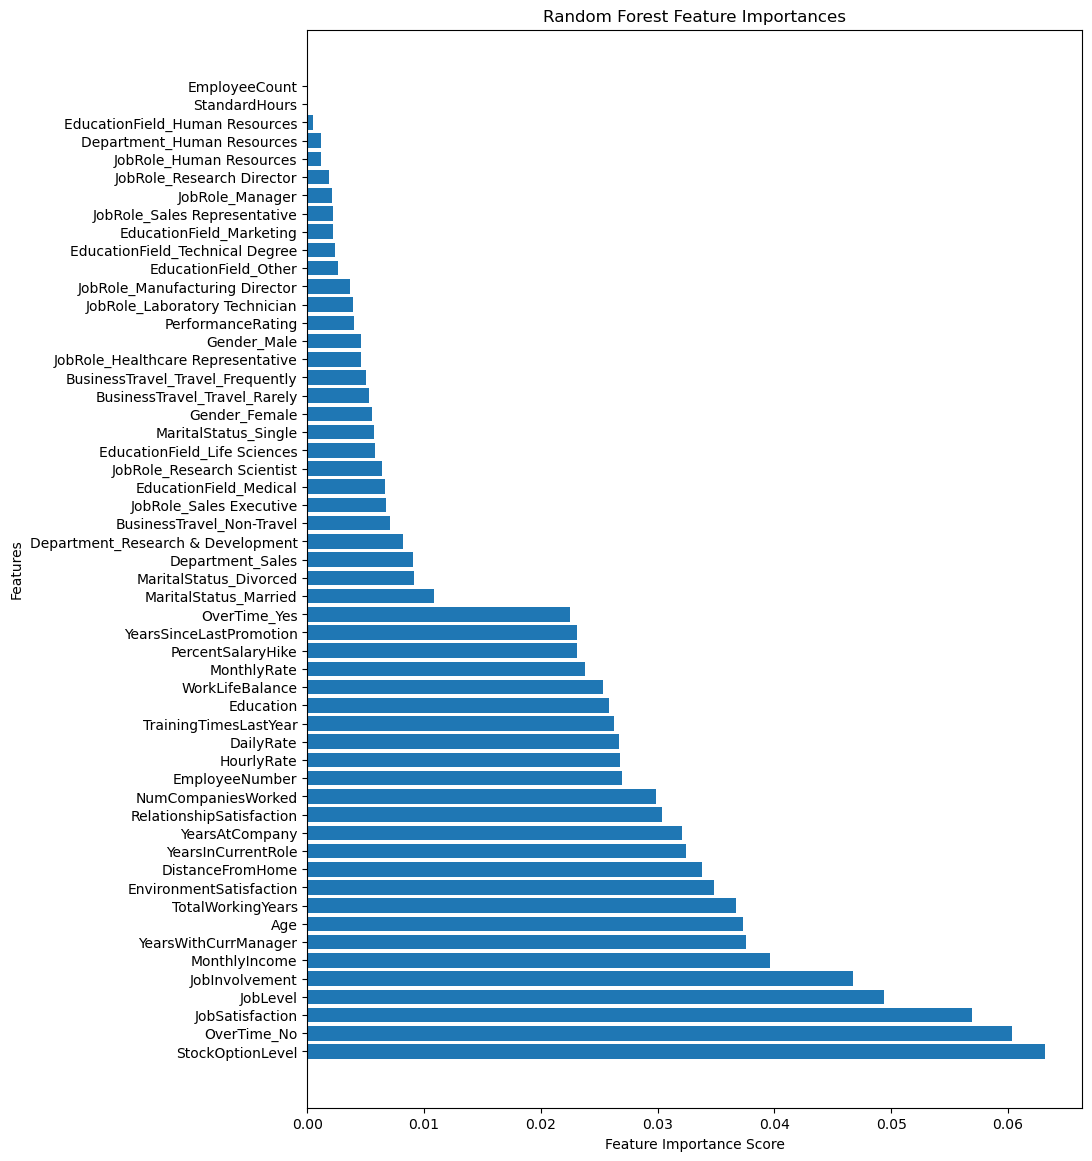

In [20]:
plt.figure(figsize=(10, 14))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.show()

In [24]:
threshold = 0.0045  
low_importance_features = importance_df[importance_df['Importance'] < threshold]['Feature'].tolist()
print("Dropping these columns:", low_importance_features)

Dropping these columns: ['PerformanceRating', 'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director', 'EducationField_Other', 'EducationField_Technical Degree', 'EducationField_Marketing', 'JobRole_Sales Representative', 'JobRole_Manager', 'JobRole_Research Director', 'JobRole_Human Resources', 'Department_Human Resources', 'EducationField_Human Resources', 'StandardHours', 'EmployeeCount']


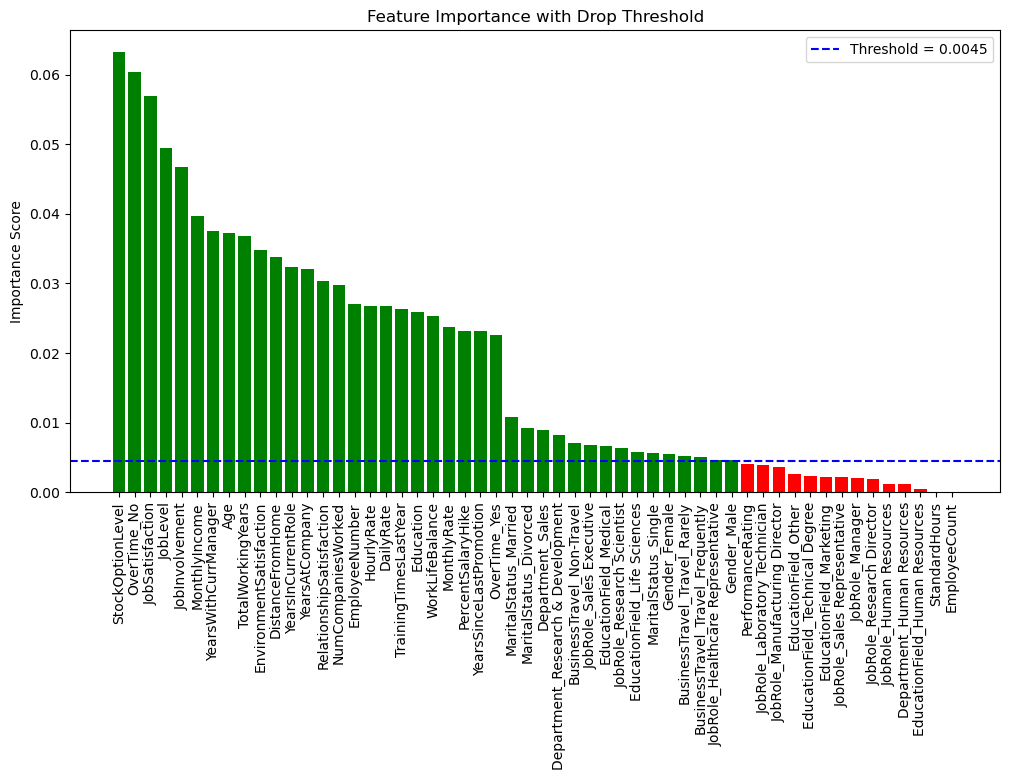

In [28]:
plt.figure(figsize=(12,6))
colors = ["red" if imp < threshold else "green" for imp in importance_df["Importance"]]
plt.bar(importance_df["Feature"], importance_df["Importance"], color=colors)
plt.axhline(y=threshold, color="blue", linestyle="--", label=f"Threshold = {threshold}")
plt.xticks(rotation=90)
plt.ylabel("Importance Score")
plt.title("Feature Importance with Drop Threshold")
plt.legend()
plt.show()

In [25]:
X_reduced = X_fe.drop(columns=low_importance_features)
df_final = pd.concat([X_reduced, y_fe], axis=1)

In [26]:
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,0.547619,0.715820,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,...,0,0,0,1,0,0,1,0,1,1
1,0.738095,0.126700,0.250000,0.00,0.000484,0.666667,0.442857,0.333333,0.25,0.333333,...,1,0,1,0,0,1,0,1,0,0
2,0.452381,0.909807,0.035714,0.25,0.001451,1.000000,0.885714,0.333333,0.00,0.666667,...,1,0,0,0,0,0,1,0,1,1
3,0.357143,0.923407,0.071429,0.75,0.001935,1.000000,0.371429,0.666667,0.00,0.666667,...,0,0,1,0,0,1,0,0,1,0
4,0.214286,0.350036,0.035714,0.00,0.002903,0.000000,0.142857,0.666667,0.00,0.333333,...,1,0,0,0,0,1,0,1,0,0


In [29]:
df_final.to_csv('D:/Machine Learning Projects/2. Employee_Attrition_Prediction/df_final.csv', index=False)

### Feature Co-Relation

In [34]:
corr_matrix = X_reduced.corr()

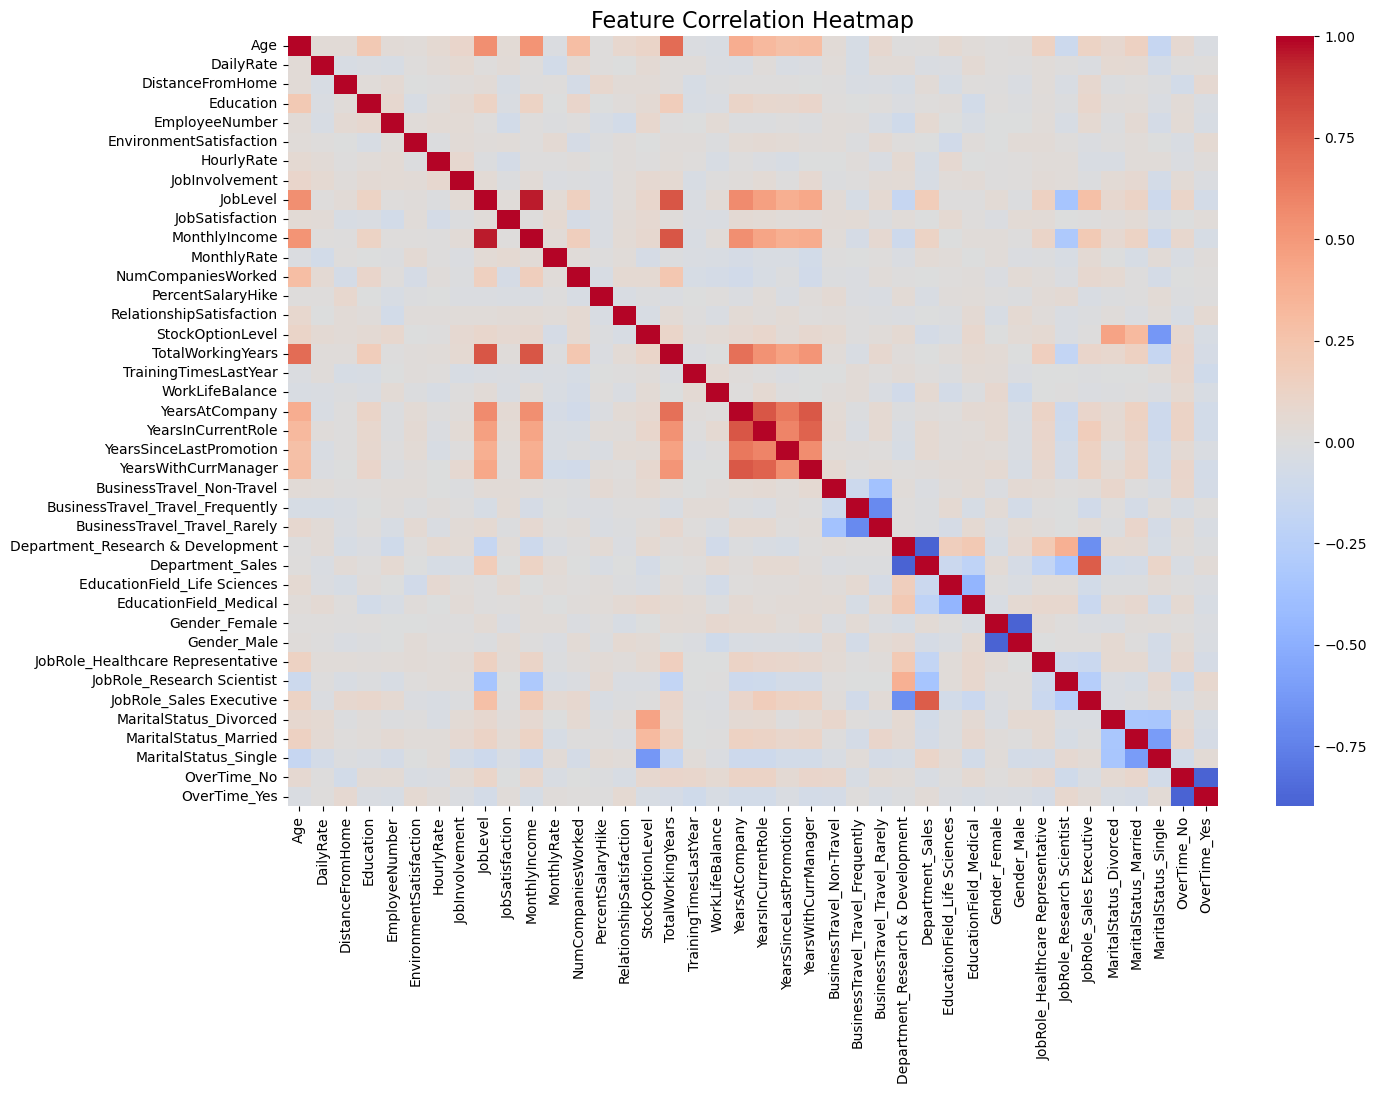

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [36]:
threshold = 0.9
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)
print("Highly correlated features to consider dropping:", high_corr_features)


Highly correlated features to consider dropping: {'MonthlyIncome'}


### Scatter Plot

Top features: ['StockOptionLevel', 'OverTime_No', 'JobSatisfaction', 'JobLevel', 'JobInvolvement']


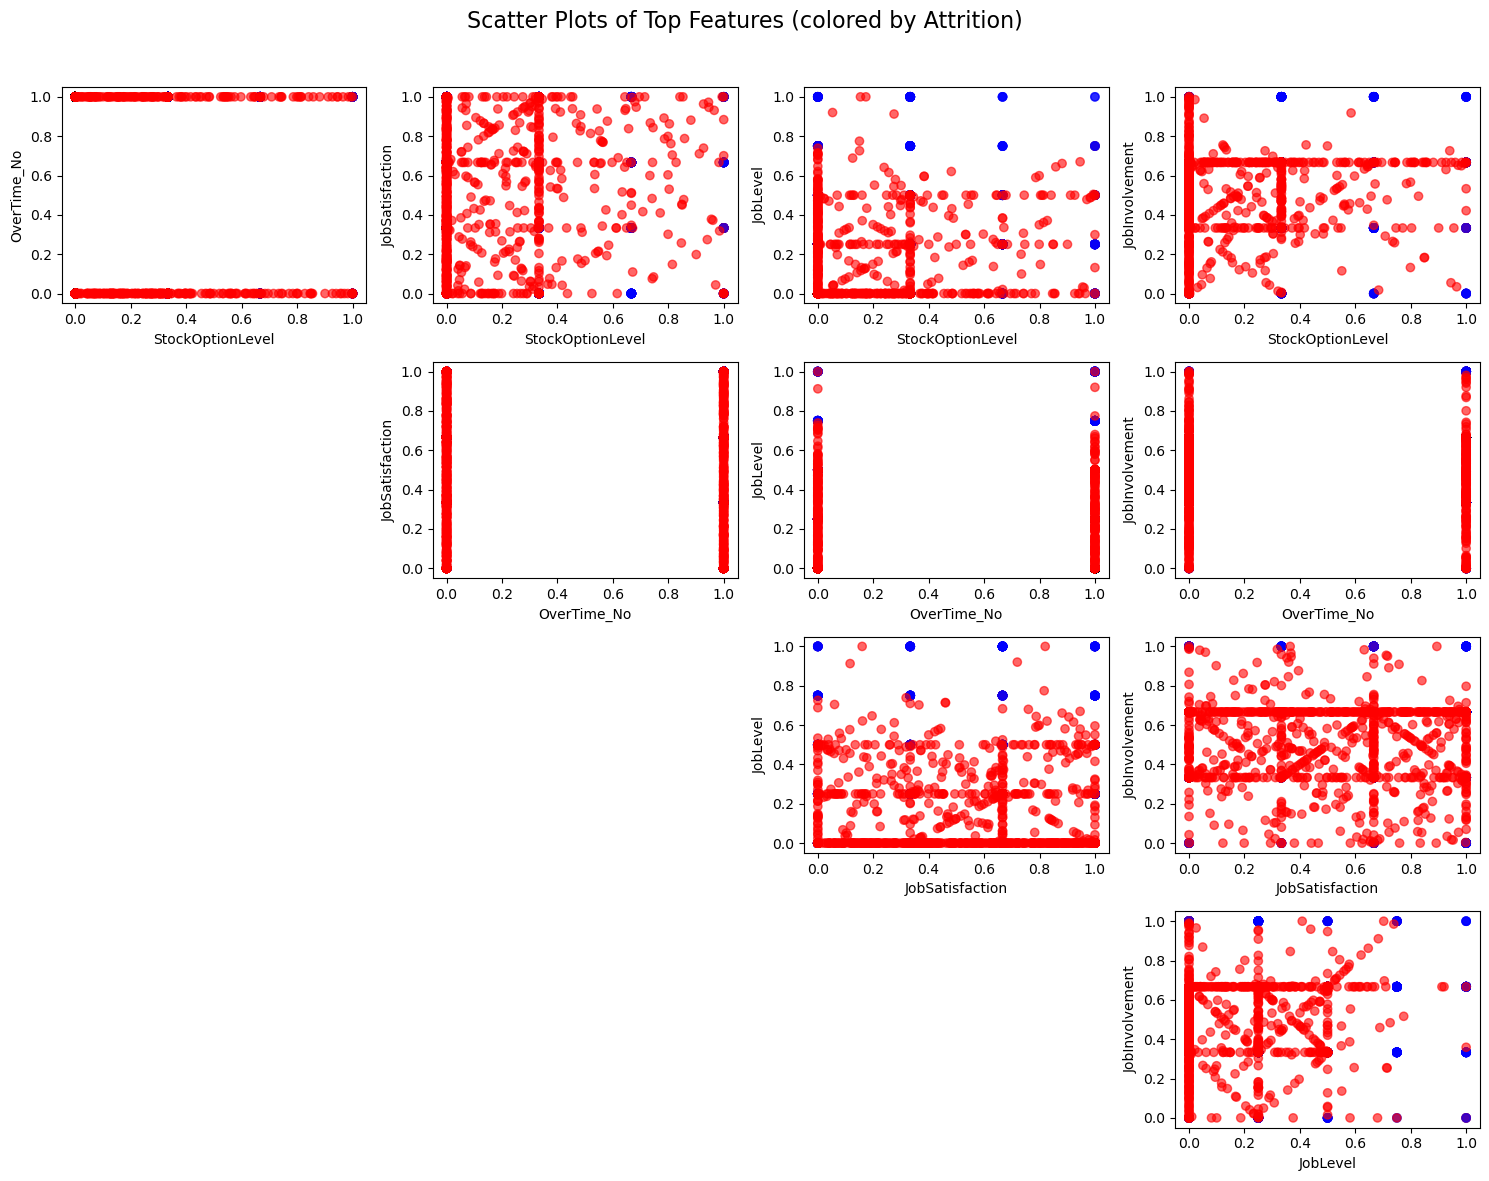

In [30]:
top_features = importance_df.head(5)['Feature'].tolist()
print("Top features:", top_features)

# Plot scatter plots for top features vs each other
plt.figure(figsize=(15, 12))

for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        plt.subplot(len(top_features)-1, len(top_features)-1, i*(len(top_features)-1) + j)
        plt.scatter(X_fe[top_features[i]], X_fe[top_features[j]], c=y_fe, cmap='bwr', alpha=0.6)
        plt.xlabel(top_features[i])
        plt.ylabel(top_features[j])

plt.suptitle("Scatter Plots of Top Features (colored by Attrition)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Top features: ['StockOptionLevel', 'OverTime_No', 'JobSatisfaction', 'JobLevel', 'JobInvolvement']


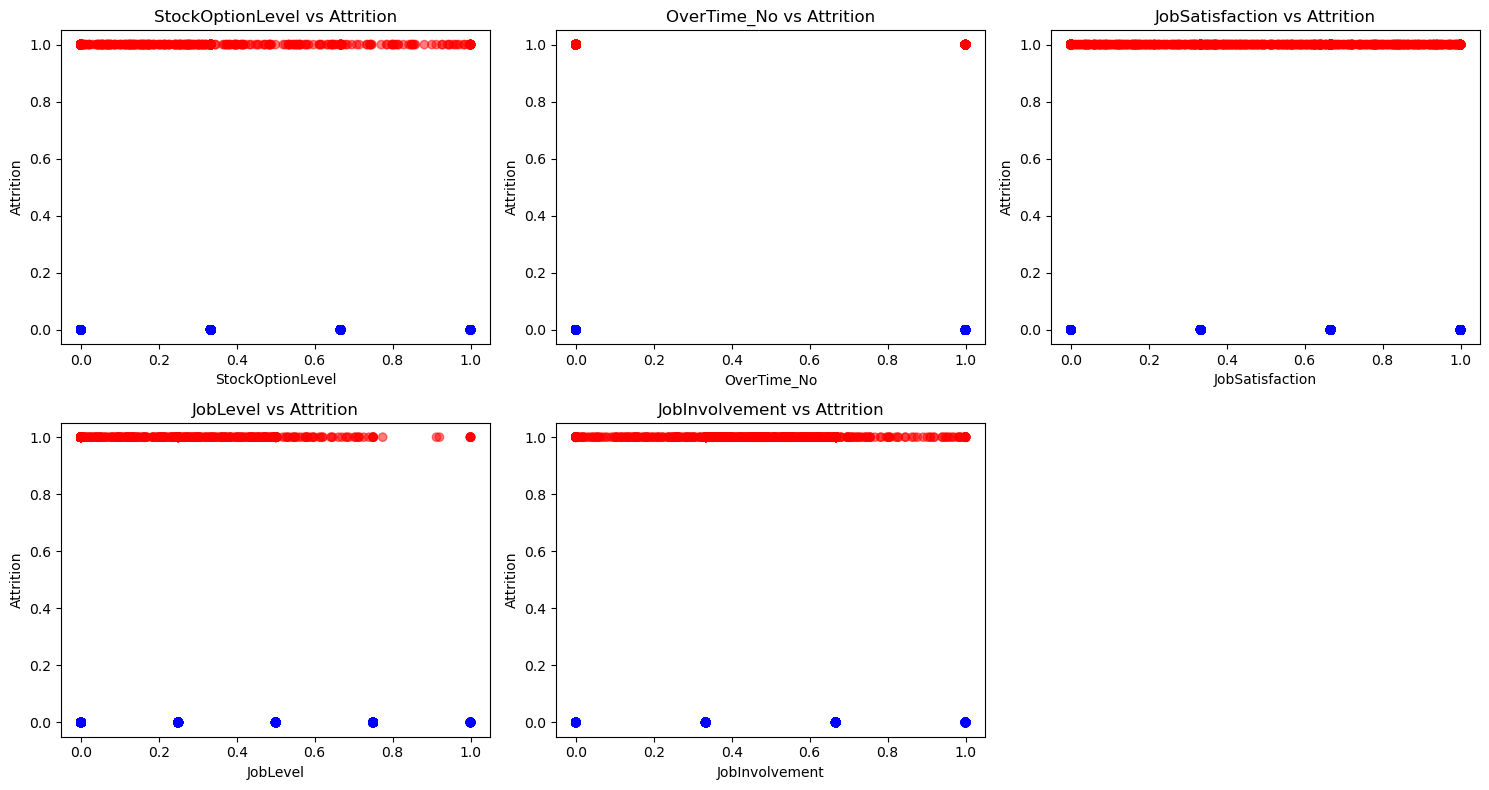

In [31]:
top_features = importance_df.head(5)['Feature'].tolist()
print("Top features:", top_features)

plt.figure(figsize=(15, 8))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_fe[feature], y_fe, alpha=0.5, c=y_fe, cmap="bwr")
    plt.xlabel(feature)
    plt.ylabel("Attrition")
    plt.title(f"{feature} vs Attrition")

plt.tight_layout()
plt.show()